# 프로젝트 1 : Image Classification

In [2]:
# 라이브러리 호출
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기기
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
# train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [5]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [6]:
# train 데이터와 validation 데이터의 개수 확인
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
# 파라미터 설정
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [8]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.3,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=False)

In [10]:
# .flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
# Data Augmentation 확인
train_data_gen[0][0].shape

(16, 256, 256, 3)

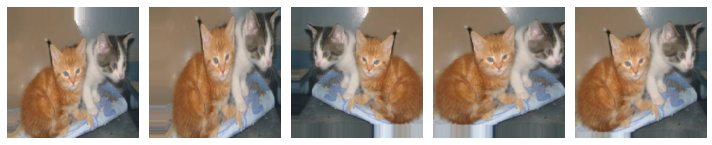

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
# Validation 데이터도 동일하게 작업
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [14]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


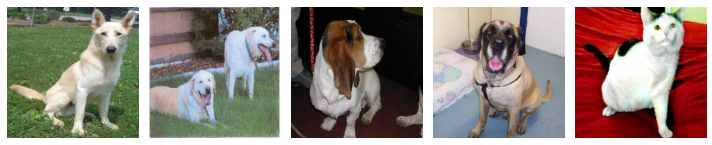

In [15]:
# Validation 데이터를 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [16]:
_[:5] # 정답 데이터

array([1., 1., 1., 1., 0.], dtype=float32)

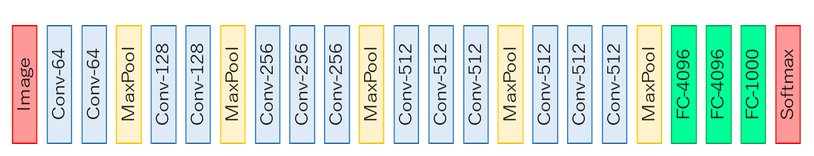

In [17]:
# VGG16 모델 구현하기
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584

In [18]:
# 손실함수, optimizer, metric을 설정
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
            optimizer=optimize,
            metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [19]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 54s 350ms/step - loss: 81.3574 - binary_accuracy: 0.5000 - val_loss: 4.2148 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 41s 323ms/step - loss: 0.7100 - binary_accuracy: 0.5000 - val_loss: 1.0053 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 40s 321ms/step - loss: 0.7846 - binary_accuracy: 0.5000 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 41s 323ms/step - loss: 0.6941 - binary_accuracy: 0.5000 - val_loss: 0.6938 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 40s 321ms/step - loss: 0.6937 - binary_accuracy: 0.5000 - val_loss: 0.6936 - val_binary_accuracy: 0.5000


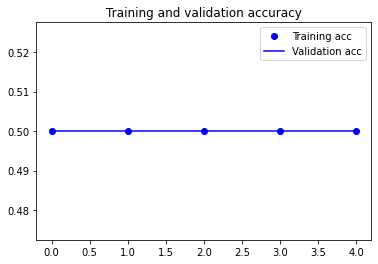

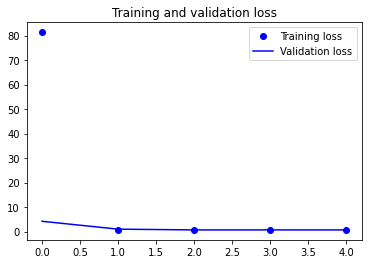

In [20]:
# 시각화(정확도)
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 모델 성능 올리기

In [21]:
# hyperparameter 설정
batch_size = 20
epochs = 8
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [22]:
# 모델 구현
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 128)     1475

In [23]:
# loss function, optimizer, metric 설정 및 모델 컴파일
loss_function=tf.keras.losses.binary_crossentropy # 이진분류이므로 그대로 사용하는 것이 적합하다 판단
optimize=tf.keras.optimizers.SGD(learning_rate=0.015) # Optimizer로 SGD 활용해보기 / 학습률 소폭 상승
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric]) # 이진 분류 문제에서 일반적으로 사용되는 평가 지표로 그대로 적용

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)] # callback 함수 활용

In [24]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
#       callbacks=callbacks_list,
      validation_freq=1)


Epoch 1/8
100/100 [==============================] - 37s 352ms/step - loss: 0.9622 - binary_accuracy: 0.4931 - val_loss: 0.7925 - val_binary_accuracy: 0.5000
Epoch 2/8
100/100 [==============================] - 35s 348ms/step - loss: 0.6994 - binary_accuracy: 0.5044 - val_loss: 0.8164 - val_binary_accuracy: 0.5000
Epoch 3/8
100/100 [==============================] - 35s 346ms/step - loss: 0.6655 - binary_accuracy: 0.4988 - val_loss: 0.6963 - val_binary_accuracy: 0.5000
Epoch 4/8
100/100 [==============================] - 35s 345ms/step - loss: 0.6446 - binary_accuracy: 0.5019 - val_loss: 0.6749 - val_binary_accuracy: 0.5000
Epoch 5/8
100/100 [==============================] - 35s 346ms/step - loss: 0.6297 - binary_accuracy: 0.5056 - val_loss: 0.7552 - val_binary_accuracy: 0.5000
Epoch 6/8
100/100 [==============================] - 35s 346ms/step - loss: 0.6151 - binary_accuracy: 0.5075 - val_loss: 0.6259 - val_binary_accuracy: 0.5000
Epoch 7/8
100/100 [==============================] -

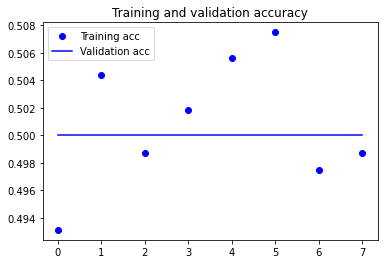

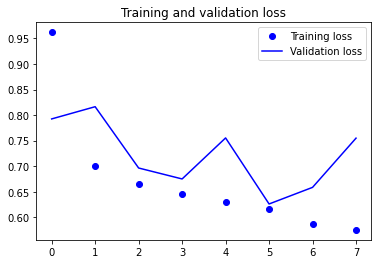

In [25]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()